In [8]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Salt and Pepper noise

In [14]:
def salt_n_pepper_noise(image,amount=0.004,s_vs_p=0.5):
    
#     if 2 == len(image.shape):
#         row,col= image.shape
#         ch = 1
        
#     else:
#         row,col,ch = image.shape
    
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #coords = [np.random.randint(0, i - 1, int(num_salt))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 1
    
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #coords = [np.random.randint(0, i - 1, int(num_pepper))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 0
    
    return out

In [25]:
np.ceil?

Call signature:  np.ceil(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'ceil'>
File:            d:\anacoda3\envs\link\lib\site-packages\numpy\__init__.py
Docstring:      
ceil(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Return the ceiling of the input, element-wise.

The ceil of the scalar `x` is the smallest integer `i`, such that
`i >= x`.  It is often denoted as :math:`\lceil x \rceil`.

Parameters
----------
x : array_like
    Input data.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the 

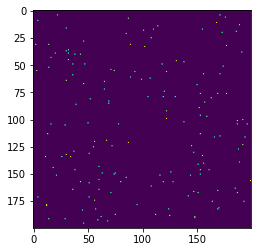

In [18]:
img = np.ones((200, 200))
astro = img - 50

plt.imshow(salt_n_pepper_noise(astro))

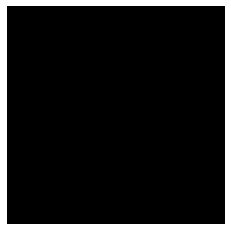

In [20]:
"""from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)
"""

# Noramlize to the range of 0~1 
#info = np.iinfo(astro.dtype)
#astro = astro/info.max

plt.axis('off')
plt.imshow(astro ,cmap='gray')

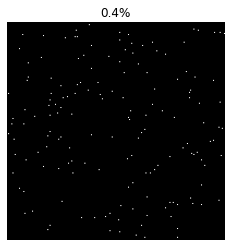

In [21]:
s_vs_p = 0.5
amount = 0.004

s_p_04 = salt_n_pepper_noise(astro,amount,s_vs_p)

plt.title('0.4%')
plt.axis('off')
plt.imshow(s_p_04 ,cmap='gray')

# Metrics

In [ ]:
import math

def mae(src,dst):
    return np.mean(np.abs(src-dst))

def mse(src,dst):
    return np.mean((src-dst)**2)

def sse(src,dst):
    return np.sum((src-dst)**2)

def rmse(src,dst):
    return np.sqrt(mse(src,dst))

def psnr(src,dst):
    mse = np.mean((src-dst)**2)
    if mse == 0:
        return math.inf
    MAX=1
    return 20* math.log10(MAX/math.sqrt(mse))

In [23]:
print('mae = {:.4f}'.format(mae(astro,s_p_04)))
print('mse = {:.4f}'.format(mse(astro,s_p_04)))
print('sse = {:.4f}'.format(sse(astro,s_p_04)))
print('rmse= {:.4f}'.format(rmse(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))

mae = 0.1980
mse = 9.8020
sse = 392080.0000
rmse= 3.1308
psnr= -9.9131


=====================================================

# Histogram

* `BINS` : 
    * 히스토그램 그래프의 X축(intensity)의 bin의 수(`histSize`)를 결정 .
    * 8bit gray scale 영상의 경우에는 0 ~ 255로 intensity가 표현되며, 이 경우 BINS은 최대 256 의 수를 가질 수 있음.
       
    * 만약, BINS값이 16으로 지정할 경우, 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개의 bin으로 표현이 됨.
    * 이는 intensity가 0~15까지 같은 bin에서 카운팅 됨을 의미!
       
    * OpenCV에서는 BINS를 histSize 라고 표현합니다.
* `channels` : 
    * 이미지에서 histogram을 만들기 위해 사용하는 값을  의미. 
    * 빛의 강도(intensity)를 기준으로 histogram을 만들지, RGB값을 기준으로  만들지를 결정.
* `range` : 
    * X축의 범위임 (각 pixel이 가질 수 있는 범위).
    * = X축의 from ~ to.

In [24]:
cv2.calcHist?

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload
Type:      builtin_function_or_method


* image  : 분석대상 이미지(uint8 or float32 type). Array형태.
* channels : 분석 채널(X축의 대상). 이미지가 graysacle이면 [0], color 이미지이면 [0,2] 형태(0 : Blue, 1: Green, 2: Red)
* mask : 이미지의 분석영역. None이면 전체 영역.
* histSize : BINS 값. [256]
* ranges : Range값. [0,256]

In [ ]:
import random

In [ ]:
img1 = cv2.imread(os.path.join(PATH, 'flower1.jpg'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(PATH, 'flower2.jpg'), cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

#plt.style.use('dark_background')
plt.subplot(2,2,1),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(2,2,2),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(2,2,3),plt.plot(hist1,color='r')
plt.subplot(2,2,4),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()


hist3 = cv2.calcHist([img1],[0],None,[32],[0,128])
print(np.shape(hist3))

plt.figure()
plt.plot(hist3,color='r')
plt.show()

## +

In [ ]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('./images/lena.png');
img = cv2.imread(os.path.join(PATH, 'lena.png'))


# mask 생성

# img.shape[:2] 기억!!

mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)




# 원본 이미지의 히스토그램 green
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램 green
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])





# bgr > rgb
#b,g,r = cv2.split(img) # divide img into b,g,r
#img = cv2.merge([r,g,b])
#b,g,r = cv2.split(masked_img)

#masked_img = cv2.merge([r,g,b])

img = img[:, :, ::-1]
# img = img[..., ::-1]도 가능함!

masked_img = masked_img[:,:,::-1]

#plt.style.use('dark_background')
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image(red)'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image(blue)'), plt.xticks([]), plt.yticks([])

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()

In [ ]:
# opencv : BGR
# numpy, matplot : RGB
plt.figure()
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_full, color='r')
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_full, color='g')
hist_full = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_full, color='b')
plt.show()

# Histogram Stretching

* Histogram 이 전구간에 펼쳐져서 나타나도록 늘려주는 기법.
* 전체적인 contrast를 향상시켜줌

$$
\textbf{dst}(x,y) 
= 
I_{max} 
\frac{ \textbf{src}(x,y) - \textbf{min}(\textbf{src[:]})} 
{\textbf{max}(\textbf{src[:]})-\textbf{min}(\textbf{src[:]})}
$$

# Histogram Equalization

* Histogram stretching 에 추가적으로 pixel의 분포값이 전영역에 고르게 분포되도록 뭉쳐있는 곳은 넓은 간격으로 histogram이 떨어지도록 조정.

* Histogram 누적 함수.
$$
\textbf{cdf}(g) = \Sigma_{0\le i \le g} h(i)
$$

* 결과 이미지의 값은 다음 수식으로 결정됨.
$$
\textbf{dst}(x,y) = round \left( I_{max} \frac{\textbf{cdf}((\textbf{src}(x,y))}{N} \right)
$$

  * 여기서 $I_{max}$는 pixel이 가질 수 있는 최대 intensity임.



In [26]:
np.histogram?

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t

## 밑바닥부터 numpy로 구현

In [ ]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('./images/hist_unequ.jpg');
img = cv2.imread(os.path.join(PATH, 'hist_unequ.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# numpy를 이용한 histogramming
hist, bin_edges = np.histogram(img.flatten(), 256,range=[0,256])
# cumulative histogram
cdf = hist.cumsum()
print(f'hist:{hist.shape},bins:{bin_edges.shape},cdf:{cdf.shape}')
plt.figure()
plt.title('original cdf')
plt.plot(cdf)




# ----------------------------------------------------
# Histogram Stretching
img_hs = 255.* (img - np.min(img))/(np.max(img)-np.min(img))

# -----------------------------------------------------



# Histogram Equalization
#
# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)
print(f'cdf_m:{cdf_m.shape}')
plt.figure()
plt.title('cdf exluding zero intensity')
plt.plot(cdf_m)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# plt.figure()
# plt.title('cdf for HE w/o zero bins'+str(len(cdf_m)))
# plt.plot(cdf_m)
# print(len(cdf_m))

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')
plt.figure()
plt.title('final_cdf for global HE /'+str(len(cdf)))
plt.plot(cdf)


img_he = cdf[img]


plt.figure(figsize=(10,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(331),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(332),plt.imshow(img_hs,cmap='gray'),plt.title('Stretching')
plt.xticks([]),plt.yticks([])
plt.subplot(333),plt.imshow(img_he,cmap='gray'),plt.title('Equalization')
plt.xticks([]),plt.yticks([])

bin_size = 4
hist, bins = np.histogram(img.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(334),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(337),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

bin_size = 4
hist, bins = np.histogram(img_hs.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(335),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(338),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')


bin_size = 8
hist, bins = np.histogram(img_he.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(336),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(339),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

plt.tight_layout()
plt.show()


## opencv에는 아주 친절하게 저게 함수가 있다.

In [ ]:
# OpenCV의 Equaliztion함수
img_he_cv = cv2.equalizeHist(img)

In [27]:
cv2.equalizeHist?

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method


### 위의 밑바닥 코드를 먼저 해 보면서 이해하고, 그 뒤부터는 opencv 함수를 쓰자!

+) github -> ssh, private key, public key   
+) hsi(color space) 쓰는 방법도 공부할 것!!!!!!

## 푸리에 변환 등의 이미지 변환들을 공부할 것!